Linear Regression - Mean squared error: 0.0187
Score values for Linear: 
[-1.21076313  0.31903477  0.84080774  0.56683858  0.74310089]

Ridge regression - Mean squared error: 0.0297
Score values for Ridge: 
[-1.06300042  0.32653135  0.75904387  0.6580902   0.72170931]

0.018808409199104387
0.9990903012864963
best alpha: 0.0100

Lasso regression - Mean squared error: 0.0190
mean score -0.4758 with std 2.0679 
Lasso regression - Mean squared error: 0.0194
mean score -0.4904 with std 2.2769 
Lasso regression - Mean squared error: 0.0199
mean score -0.5061 with std 2.2645 
Lasso regression - Mean squared error: 0.0206
mean score -0.5565 with std 2.3281 
Lasso regression - Mean squared error: 0.0214
mean score -0.5657 with std 2.3155 
Lasso regression - Mean squared error: 0.0223
mean score -0.5682 with std 2.3066 
Lasso regression - Mean squared error: 0.0233
mean score -0.5654 with std 2.3004 
Lasso regression - Mean squared error: 0.0245
mean score -0.5627 with std 2.2943 
Lasso regressi

/Users/mariacosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03991976071165052, tolerance: 0.024839959558768644
  model = cd_fast.enet_coordinate_descent(
/Users/mariacosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07099413433293852, tolerance: 0.02809464143556116
  model = cd_fast.enet_coordinate_descent(
/Users/mariacosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07470590018129314, tolerance: 0.027677547453709303
  model = cd_fast.enet_coordinate_descent(
/Users/mariacosta/opt/anaconda3/lib/python3.

mean score -0.5229 with std 2.1888 
Lasso regression - Mean squared error: 0.0539
mean score -0.5210 with std 2.1826 
Lasso regression - Mean squared error: 0.0561
mean score -0.5190 with std 2.1762 
Lasso regression - Mean squared error: 0.0584
mean score -0.5170 with std 2.1700 
Lasso regression - Mean squared error: 0.0607
mean score -0.5151 with std 2.1638 
Lasso regression - Mean squared error: 0.0631
mean score -0.5132 with std 2.1575 
Lasso regression - Mean squared error: 0.0656
mean score -0.5113 with std 2.1512 
Lasso regression - Mean squared error: 0.0682
mean score -0.5095 with std 2.1450 
Lasso regression - Mean squared error: 0.0709
mean score -0.5076 with std 2.1387 
Lasso regression - Mean squared error: 0.0738
mean score -0.5058 with std 2.1324 
Lasso regression - Mean squared error: 0.0768
mean score -0.5041 with std 2.1262 
Lasso regression - Mean squared error: 0.0798
mean score -0.5023 with std 2.1199 
Lasso regression - Mean squared error: 0.0829
mean score -0.50

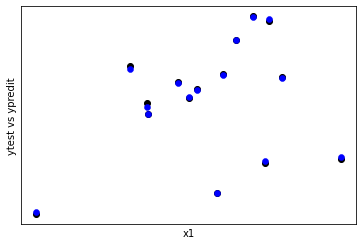

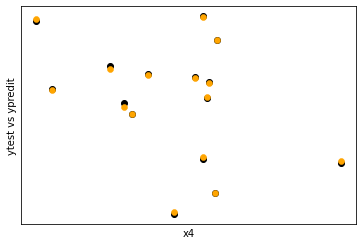

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import balanced_accuracy_score as BACC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

#importing data sets
X = np.load('Xtrain_Regression_Part1.npy')
Y = np.load('Ytrain_Regression_Part1.npy')
#Xtest = np.load('Xtest_Regression_part1.npy')

#centering the data 
Xmean = np.mean(X, axis=0)
X -= Xmean
Ymean = np.mean(Y)
Y -= Ymean

#splitting the data sets into training and testing 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.15, random_state=0)
#este comando acima faz a separação entre Xtrain, Xtest, Ytrain e Ytest. Como test_size=0.50, então fica metade da amostra num lado e metade no outro
#se test_size fosse 0.60, então 60% da amostra ficava no test e 40% no train
#é equivalente a usar os seguinte: 
        # Xtrain = X[:-50]; 
        # Xtest = X[-50:]; 
        # Ytrain = Y[:-50]; 
        # Ytest = Y[-50:]

        
#Linear Regression
reg = LinearRegression().fit(Xtrain, Ytrain)
Ypred = reg.predict(Xtest)

print('Linear Regression - Mean squared error: %.4f' % mean_squared_error(Ytest, Ypred))
scores = cross_val_score(reg, Xtest, Ytest, cv=5)
print('Score values for Linear: ')
print( scores)
print('')

#Linear Regression with Ridge
regR = linear_model.Ridge(alpha =0.8)
regR.fit(Xtrain, Ytrain)
#print(regR.coef_)
YpredR = regR.predict(Xtest)
print('Ridge regression - Mean squared error: %.4f' % mean_squared_error(Ytest, YpredR))
scores = cross_val_score(regR, Xtest, Ytest, cv=5)
print('Score values for Ridge: ')
print( scores)
print('')

regR1 = linear_model.RidgeCV(alphas = np.linspace(10e-6, 0.01 , 100), cv=10).fit(Xtrain, Ytrain)
YpredR1 = regR1.predict(Xtest)
print(mean_squared_error(Ytest, YpredR1))
print(regR1.score(Xtest, Ytest))
print('best alpha: %.4f' % regR1.alpha_)
print('')


#Linear Regression with Lasso

for i in range(1,100):
    regL = linear_model.Lasso(alpha = 0.001*i).fit(Xtrain, Ytrain)
    #print(regL.coef_)
    YpredL = regL.predict(Xtest)
    print('Lasso regression - Mean squared error: %.4f' % mean_squared_error(Ytest, YpredL))
    scores = cross_val_score(regL, Xtest, Ytest, cv=5)
    print('mean score %.4f with std %.4f ' % (scores.mean(), scores.std()))

#scores = cross_val_score(regL, Xtest, Ytest, cv=5)
#print('Score values for Lasso: ')
#print(scores)
print('')


#plot para a componente x1 do vetor
plot1 = plt.figure(1)
plt.scatter(Xtest[:,0], Ytest, color='black')
plt.scatter(Xtest[:,0], Ypred, color='blue', linewidth = 0.5)
plt.xticks(())
plt.yticks(())
plt.xlabel('x1')
plt.ylabel('ytest vs ypredit')

#plot para a componente x4 do vetor
plot2 = plt.figure(2)
plt.scatter(Xtest[:,17], Ytest, color='black')
plt.scatter(Xtest[:,17], Ypred, color='orange', linewidth = 0.5)
plt.xticks(())
plt.yticks(())
plt.xlabel('x4')
plt.ylabel('ytest vs ypredit')



plt.show()


